#**WEATHER - DATASET**

## Modelo K MEANS

## Descri√ß√£o das vari√°veis:

1. Formatted Date
Data registrada no dataset, convertida para formato timestamp [segundos desde 01/01/1970].
2. Summary
Descri√ß√£o textual do clima em determinado momento ["Clear", "Partly Cloudy"].
3. Precip Type
Tipo de precipita√ß√£o registrada ["Rain", "Snow", ou valores nulos indicando aus√™ncia de precipita√ß√£o].
4. Temperature (C)
Temperatura registrada em graus Celsius [valor num√©rico].
5. Apparent Temperature (C)
Temperatura percebida (sensa√ß√£o t√©rmica) em graus Celsius [valor num√©rico].
6. Humidity
Umidade relativa do ar registrada, variando de 0 (muito seco) a 1 (muito √∫mido).
7. Wind Speed (km/h)
Velocidade do vento em quil√¥metros por hora [valor num√©rico].
8. Wind Bearing (degrees)
Dire√ß√£o do vento em graus, variando de 0 a 360, indicando a origem do vento.
9. Visibility (km)
Visibilidade em quil√¥metros, indicando a clareza do ar [valor num√©rico].
10. Loud Cover
Cobertura de nuvens registrada, geralmente representada por valores constantes [valor num√©rico].
11. Pressure (millibars)
Press√£o atmosf√©rica registrada em milibares [valor num√©rico].
12. Daily Summary
Resumo textual do clima di√°rio ["Partly cloudy throughout the day"].

## Importa√ß√£o de Bibliotecas e do Dataset

In [ ]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE


In [ ]:
uploaded = files.upload()

df = pd.read_csv(next(iter(uploaded)))

Saving weatherHistory.csv to weatherHistory (1).csv


## An√°lise Explorat√≥ria

In [ ]:
df.head()

Formatted Date        Summary Precip Type  Temperature (C)  \
0  2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain         9.472222   
1  2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain         9.355556   
2  2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain         9.377778   
3  2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain         8.288889   
4  2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain         8.755556   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  7.388889      0.89            14.1197   
1                  7.227778      0.86            14.2646   
2                  9.377778      0.89             3.9284   
3                  5.944444      0.83            14.1036   
4                  6.977778      0.83            11.0446   

   Wind Bearing (degrees)  Visibility (km)  Loud Cover  Pressure (millibars)  \
0                   251.0          15.8263         0.0               1015.13   
1                   259.0          15.8263         0.0               1015.63   
2                   204.0          14.9569         0.0               1015.94   
3                   269.0          15.8263         0.0               1016.41   
4                   259.0          15.8263         0.0               1016.51   

                       Daily Summary  
0  Partly cloudy throughout the day.  
1  Partly cloudy throughout the day.  
2  Partly cloudy throughout the day.  
3  Partly cloudy throughout the day.  
4  Partly cloudy throughout the day.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [ ]:
df.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [ ]:
df.describe()

Temperature (C)  Apparent Temperature (C)      Humidity  \
count     96453.000000              96453.000000  96453.000000   
mean         11.932678                 10.855029      0.734899   
std           9.551546                 10.696847      0.195473   
min         -21.822222                -27.716667      0.000000   
25%           4.688889                  2.311111      0.600000   
50%          12.000000                 12.000000      0.780000   
75%          18.838889                 18.838889      0.890000   
max          39.905556                 39.344444      1.000000   

       Wind Speed (km/h)  Wind Bearing (degrees)  Visibility (km)  Loud Cover  \
count       96453.000000            96453.000000     96453.000000     96453.0   
mean           10.810640              187.509232        10.347325         0.0   
std             6.913571              107.383428         4.192123         0.0   
min             0.000000                0.000000         0.000000         0.0   
25%             5.828200              116.000000         8.339800         0.0   
50%             9.965900              180.000000        10.046400         0.0   
75%            14.135800              290.000000        14.812000         0.0   
max            63.852600              359.000000        16.100000         0.0   

       Pressure (millibars)  
count          96453.000000  
mean            1003.235956  
std              116.969906  
min                0.000000  
25%             1011.900000  
50%             1016.450000  
75%             1021.090000  
max             1046.380000

In [ ]:
summary_counts = df['Summary'].value_counts()
print("Contagem de valores na coluna 'Summary':\n", summary_counts)

precip_type_counts = df['Precip Type'].value_counts()
print("Contagem de valores na coluna 'Precip Type':\n", precip_type_counts)

Contagem de valores na coluna 'Summary':
 Summary
Partly Cloudy                          31733
Mostly Cloudy                          28094
Overcast                               16597
Clear                                  10890
Foggy                                   7148
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Breezy and Foggy                          35
Windy and Mostly Cloudy                   35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy

In [ ]:
print("Tipos de datos:\n", df.dtypes)

for col in df.select_dtypes(include=['object']).columns:
    try:

        df[col] = pd.to_datetime(df[col], format="%Y-%m-%d %H:%M:%S", errors='coerce', utc=True)

        if pd.api.types.is_datetime64_any_dtype(df[col]):
            df[col] = df[col].apply(lambda x: x.timestamp() if pd.notnull(x) else None)
    except Exception as e:
        print(f"No se pudo convertir la columna {col} a fecha. Motivo: {e}")

Tipos de datos:
 Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Loud Cover                  float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object


In [ ]:
df_numeric = df.select_dtypes(include=['number'])

imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df_numeric), columns=df_numeric.columns)

#Pr√©-processamento de dados

In [ ]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_imputed)


## Modelo K-means - Avalia√ß√£o da In√©rcia para Determina√ß√£o do N√∫mero de Clusters √ìtimo

Este c√≥digo aplica o algoritmo K-means para diferentes n√∫meros de clusters (k variando de 1 a 10) e calcular a in√©rcia, que √© a soma das dist√¢ncias quadradas entre os pontos e os centros dos clusters. A in√©rcia √© utilizada para ajudar a identificar o n√∫mero ideal de clusters, normalmente atrav√©s do m√©todo do cotovelo (elbow method).

Defini√ß√£o de uma lista para armazenar os valores de in√©rcia para cada n√∫mero de clusters

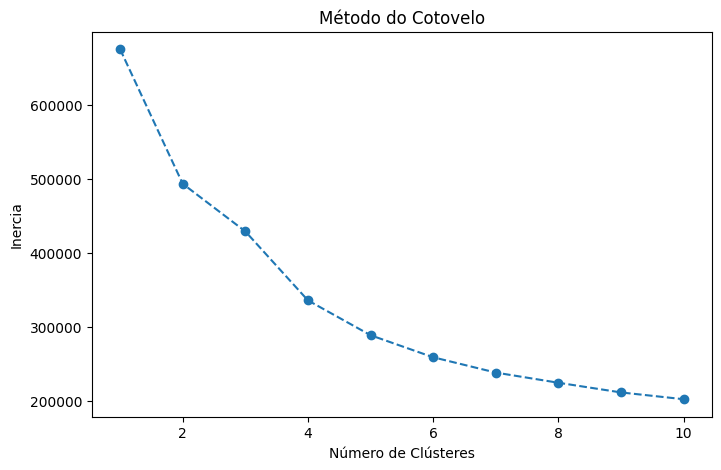

In [ ]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('N√∫mero de Cl√∫steres')
plt.ylabel('Inercia')
plt.title('M√©todo do Cotovelo')
plt.show()

# Treinamento do Modelo K-means com 3 Clusters (valor √≥timo de k)

Ap√≥s a an√°lise da in√©rcia e defini√ß√£o do n√∫mero ideal de clusters (k=3),
o modelo K-means √© treinado com o n√∫mero de clusters escolhido.
O m√©todo fit_predict √© usado para ajustar o modelo aos dados escalonados
e, simultaneamente, prever os clusters de cada ponto de dados.

# Visualiza√ß√£o dos clusters com PCA (An√°lise de Componentes Principais)

A PCA √© aplicada para reduzir a dimensionalidade dos dados para 2 componentes principais, permitindo que os clusters sejam visualizados em um gr√°fico 2D. Isso ajuda a entender como os diferentes clusters se distribuem no espa√ßo de caracter√≠sticas reduzido.

In [ ]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(df_scaled)

df_numeric['Cluster'] = clusters

pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_scaled)

#Gr√°fico - Cl√∫steres Visualizado con PCA.
O gr√°fico de dispers√£o demonstra a segmenta√ß√£o dos dados meteorol√≥gicos em tr√™s clusters distintos, identificados pelo algoritmo KMeans. A redu√ß√£o de dimensionalidade usando PCA preservou as principais caracter√≠sticas dos dados, permitindo visualizar padr√µes relevantes, como a separa√ß√£o das condi√ß√µes clim√°ticas com base em vari√°veis como temperatura, umidade e press√£o. Essa an√°lise pode ser usada para categorizar condi√ß√µes clim√°ticas t√≠picas e apoiar decis√µes baseadas nos grupos identificados

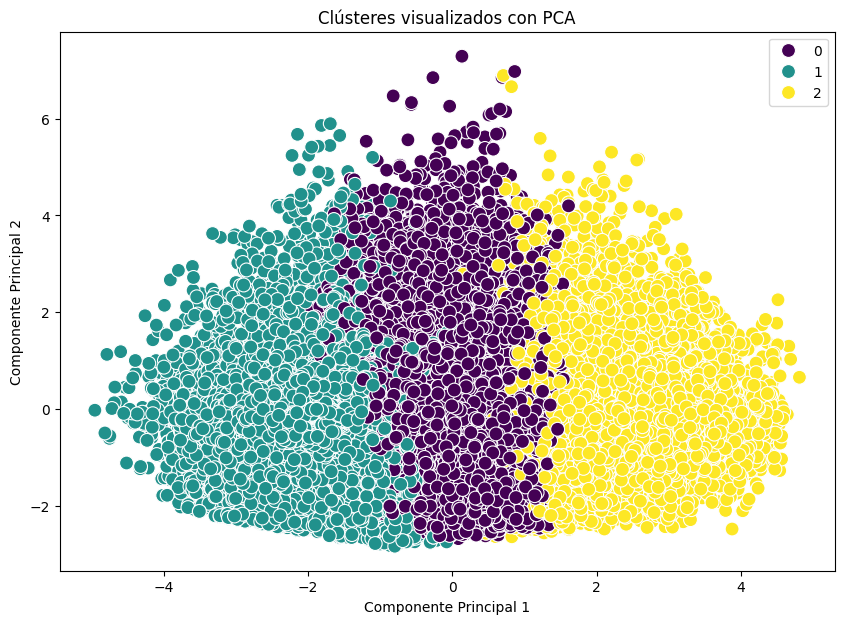

In [ ]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=df_numeric['Cluster'], palette='viridis', s=100)
plt.title('Cl√∫steres visualizados con PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.show()

#Silhouette Scores
O Gr√°fico de Silhouette Score demonstra a qualidade da separa√ß√£o dos clusters para diferentes valores de
ùëò
k (n√∫mero de clusters). O valor m√°ximo √© observado em
ùëò
=
2
k=2, indicando que dois clusters oferecem a melhor separa√ß√£o dos dados. No entanto,
ùëò
=
3
k=3 foi utilizado para a an√°lise devido √† sua capacidade de capturar padr√µes mais complexos e atender aos objetivos espec√≠ficos do estudo



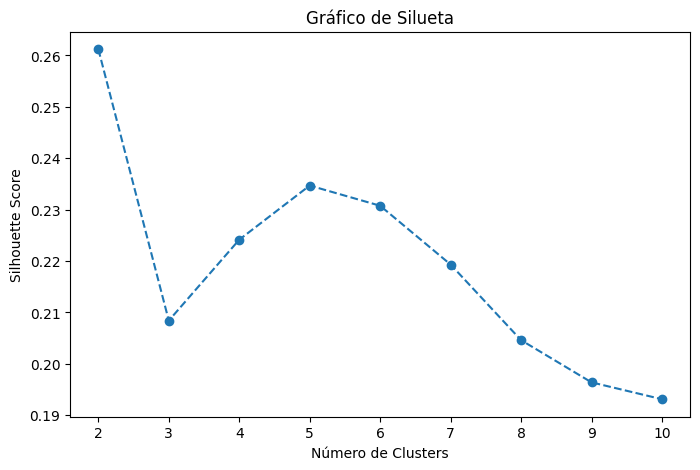

In [ ]:
scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    score = silhouette_score(df_scaled, kmeans.labels_)
    scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), scores, marker='o', linestyle='--')
plt.title("Gr√°fico de Silueta")
plt.xlabel("N√∫mero de Clusters")
plt.ylabel("Silhouette Score")
plt.show()


#Hip√≥tese:
Clusters espec√≠ficos representam padr√µes distintos de clima durante o dia ou √† noite - Kmeans

##Varia√ß√£o dos Clusters por Hora do Dia:

O gr√°fico mostra que h√° varia√ß√µes significativas na frequ√™ncia dos clusters em diferentes horas do dia. Isso sugere que os clusters gerados pelo K-means capturam mudan√ßas nos padr√µes clim√°ticos que ocorrem ao longo do ciclo di√°rio (dia e noite).

##Ciclo de Transi√ß√£o Diurno e Noturno:

Observamos que alguns clusters possuem maior predomin√¢ncia em hor√°rios noturnos (ex.: 0h √†s 6h) e outros predominam durante o per√≠odo diurno (ex.: 9h √†s 18h). Isso pode indicar que os fatores clim√°ticos usados como entrada no modelo (temperatura, umidade, etc.) variam significativamente entre dia e noite.

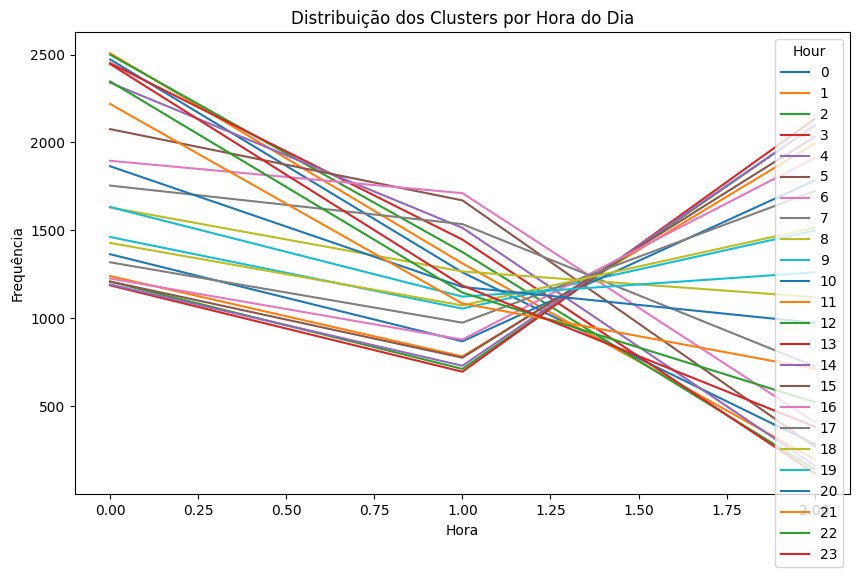

In [ ]:
df_numeric['Date'] = pd.date_range(start='2022-01-01', periods=len(df_numeric), freq='h')
df_numeric['Hour'] = pd.to_datetime(df_numeric['Date']).dt.hour

cluster_hour = df_numeric.groupby(['Cluster', 'Hour']).size().unstack()
cluster_hour.plot(kind='line', figsize=(10, 6))
plt.title("Distribui√ß√£o dos Clusters por Hora do Dia")
plt.xlabel("Hora")
plt.ylabel("Frequ√™ncia")
plt.show()

##M√≥delo DBScan

O gr√°fico amostra a clusteriza√ß√£o aplicada aos dados clim√°ticos utilizando o algoritmo DBSCAN. Aqui

#Resultados da Clusteriza√ß√£o
#Clusters Identificados:
O modelo DBSCAN identificou cinco clusters principais:
Cluster 0 (Roxo): O maior cluster, representando a maioria dos dados e associando-se √† densidade maior dos padr√µes clim√°ticos mais frequentes.
Cluster 15 (Azul), Cluster 30 (Ciano), Cluster 45 (Verde-claro), Cluster 60 (Amarelo): Representam grupos menores com caracter√≠sticas clim√°ticas distintas, embora esses clusters sejam menos densos, destacando padr√µes clim√°ticos espec√≠ficos ou menos frequentes.
# Aus√™ncia de Ru√≠dos:
N√£o foram identificados pontos como ru√≠do (-1). Isso indica que todos os dados foram atribu√≠dos a um dos clusters com base nos par√¢metros definidos para o DBSCAN.

O modelo DBSCAN foi capaz de identificar clusters representando diferentes padr√µes clim√°ticos, com uma grande parte dos dados concentrada no Cluster 0 e outros clusters menores representando eventos menos frequentes.
N√£o h√° pontos classificados como ru√≠do, o que significa que todos os dados foram agrupados em um dos clusters.

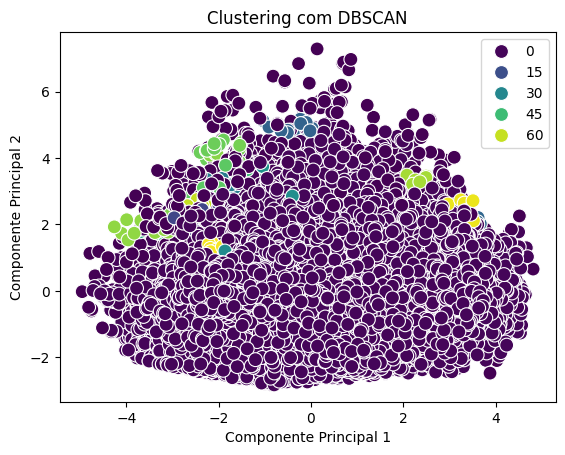

In [ ]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(df_scaled)

df_numeric['DBSCAN_Cluster'] = labels

sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=labels, palette='viridis', s=100)
plt.title("Clustering com DBSCAN")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()


##M√≥delo TSNE

O gr√°fico representa a proje√ß√£o bidimensional dos dados clusterizados utilizando o t-SNE (t-distributed Stochastic Neighbor Embedding). Essa t√©cnica reduz a dimensionalidade dos dados clim√°ticos para um espa√ßo 2D, facilitando a visualiza√ß√£o e an√°lise dos clusters formados pelo modelo.

#Valida√ß√£o dos Clusters:

A separa√ß√£o dos grupos no gr√°fico indica que o modelo de clusteriza√ß√£o conseguiu identificar padr√µes distintos nos dados clim√°ticos.
A an√°lise visual sugere uma boa coer√™ncia no agrupamento.
Explora√ß√£o de Padr√µes:

O cluster 0 pode representar a densidade maior de eventos clim√°ticos recorrentes.
Clusters 1 e 2 indicam padr√µes menos frequentes, mas relevantes.

#Componentes:

Componente 1 e Componente 2:
As duas dimens√µes no gr√°fico correspondem a proje√ß√µes n√£o lineares dos dados clim√°ticos, calculadas pelo t-SNE.
Embora essas dimens√µes n√£o tenham um significado f√≠sico direto, elas maximizam a separa√ß√£o visual entre os grupos.


#Confirma√ß√£o da Clusteriza√ß√£o:

O gr√°fico ajuda a validar visualmente se os clusters definidos pelo modelo fazem sentido em termos de separa√ß√£o e coes√£o dos grupos.
Clusters bem separados no gr√°fico indicam uma boa performance do modelo.
Explora√ß√£o dos Dados:

Pode-se analisar quais grupos possuem maior densidade e quais representam padr√µes ou eventos clim√°ticos menos frequentes.



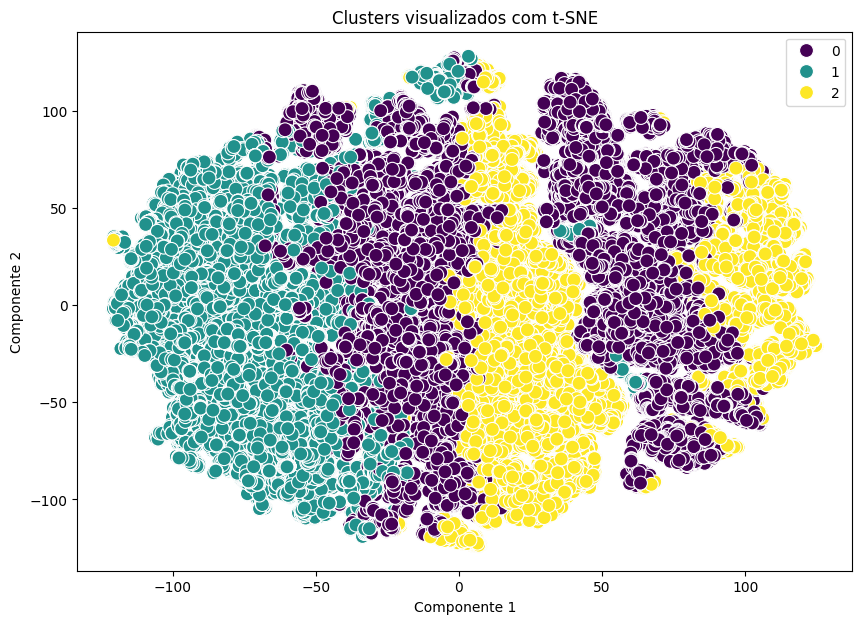

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
tsne_components = tsne.fit_transform(df_scaled)

plt.figure(figsize=(10, 7))
sns.scatterplot(x=tsne_components[:, 0], y=tsne_components[:, 1], hue=df_numeric['Cluster'], palette='viridis', s=100)
plt.title('Clusters visualizados com t-SNE')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.legend()
plt.show()


##M√≥delo DBScan Com PCA

# Clusters Identificados:
O modelo identificou cinco clusters principais com os seguintes r√≥tulos:
Cluster 0 (Roxo): O maior cluster, representando a maioria dos dados e, possivelmente, eventos clim√°ticos mais recorrentes.
Cluster 15 (Azul): Agrupamento menor que sugere caracter√≠sticas clim√°ticas espec√≠ficas.
Cluster 30 (Ciano): Cluster intermedi√°rio em termos de densidade.
Cluster 45 (Verde-claro): Pode indicar um padr√£o clim√°tico menos frequente.
Cluster 60 (Amarelo): Um grupo pequeno que se destaca, possivelmente associado a eventos mais raros ou extremos.
# Aus√™ncia de Ru√≠dos:
N√£o foram identificados pontos como ru√≠do (-1), indicando que o DBSCAN conseguiu alocar todos os dados em algum cluster com base nos par√¢metros configurados.

##Valida√ß√£o da Clusteriza√ß√£o:

O gr√°fico demonstra boa separa√ß√£o entre os clusters, indicando que o DBSCAN conseguiu identificar padr√µes distintos nos dados clim√°ticos.
O maior cluster (0) concentra os eventos clim√°ticos mais frequentes, enquanto clusters menores representam grupos com padr√µes espec√≠ficos.
Explora√ß√£o de Padr√µes Clim√°ticos:

Cluster 0: Provavelmente associado √†s condi√ß√µes clim√°ticas mais frequentes no conjunto de dados.
Clusters 15, 30, 45 e 60: Podem estar relacionados a caracter√≠sticas menos comuns ou eventos clim√°ticos mais espec√≠ficos e raros.







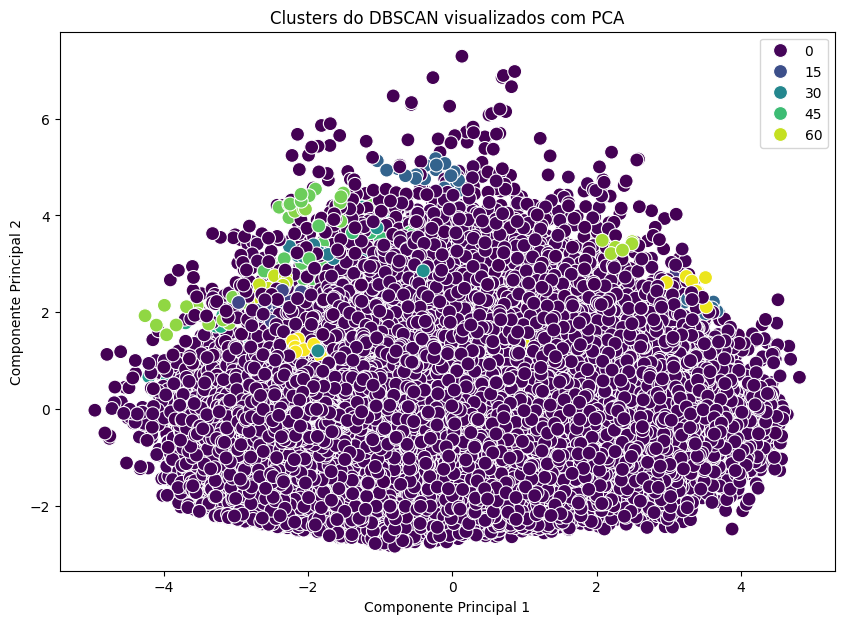

In [ ]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(df_scaled)

df_numeric['DBSCAN_Cluster'] = dbscan_labels

plt.figure(figsize=(10, 7))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=df_numeric['DBSCAN_Cluster'], palette='viridis', s=100)
plt.title('Clusters do DBSCAN visualizados com PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.show()